# 수치형 변수를 뜯어보자 !

In [1]:
import os, sys
# 현재 작업 디렉토리 경로를 얻습니다
notebook_dir = os.getcwd()

# common 디렉토리 경로 추가
common_dir = os.path.join(notebook_dir, '..', 'common')
sys.path.append(common_dir)

In [2]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from utils import read_split_data

from sklearn.preprocessing import MinMaxScaler, Normalizer

In [3]:
data_path = "/Users/hwangjaewon/Desktop/lgaimers/Jaewon/dataset/"
X_train, X_val, y_train, y_val, test = read_split_data(data_path)

Train Size:205080
Validation Size:51271
Test Size:90067


In [22]:
train = pd.concat([X_train, y_train], axis = 1)

In [5]:
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일",
]
len(numeric_columns)

20

In [13]:
def plot_histograms(df):
    num_vars = len(numeric_columns)
    rows = (num_vars // 5) + 1  # 한 행에 5개씩 배치

    fig, axes = plt.subplots(rows, 5, figsize=(20, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")

    for j in range(i + 1, len(axes)):  # 남은 빈 공간 제거
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

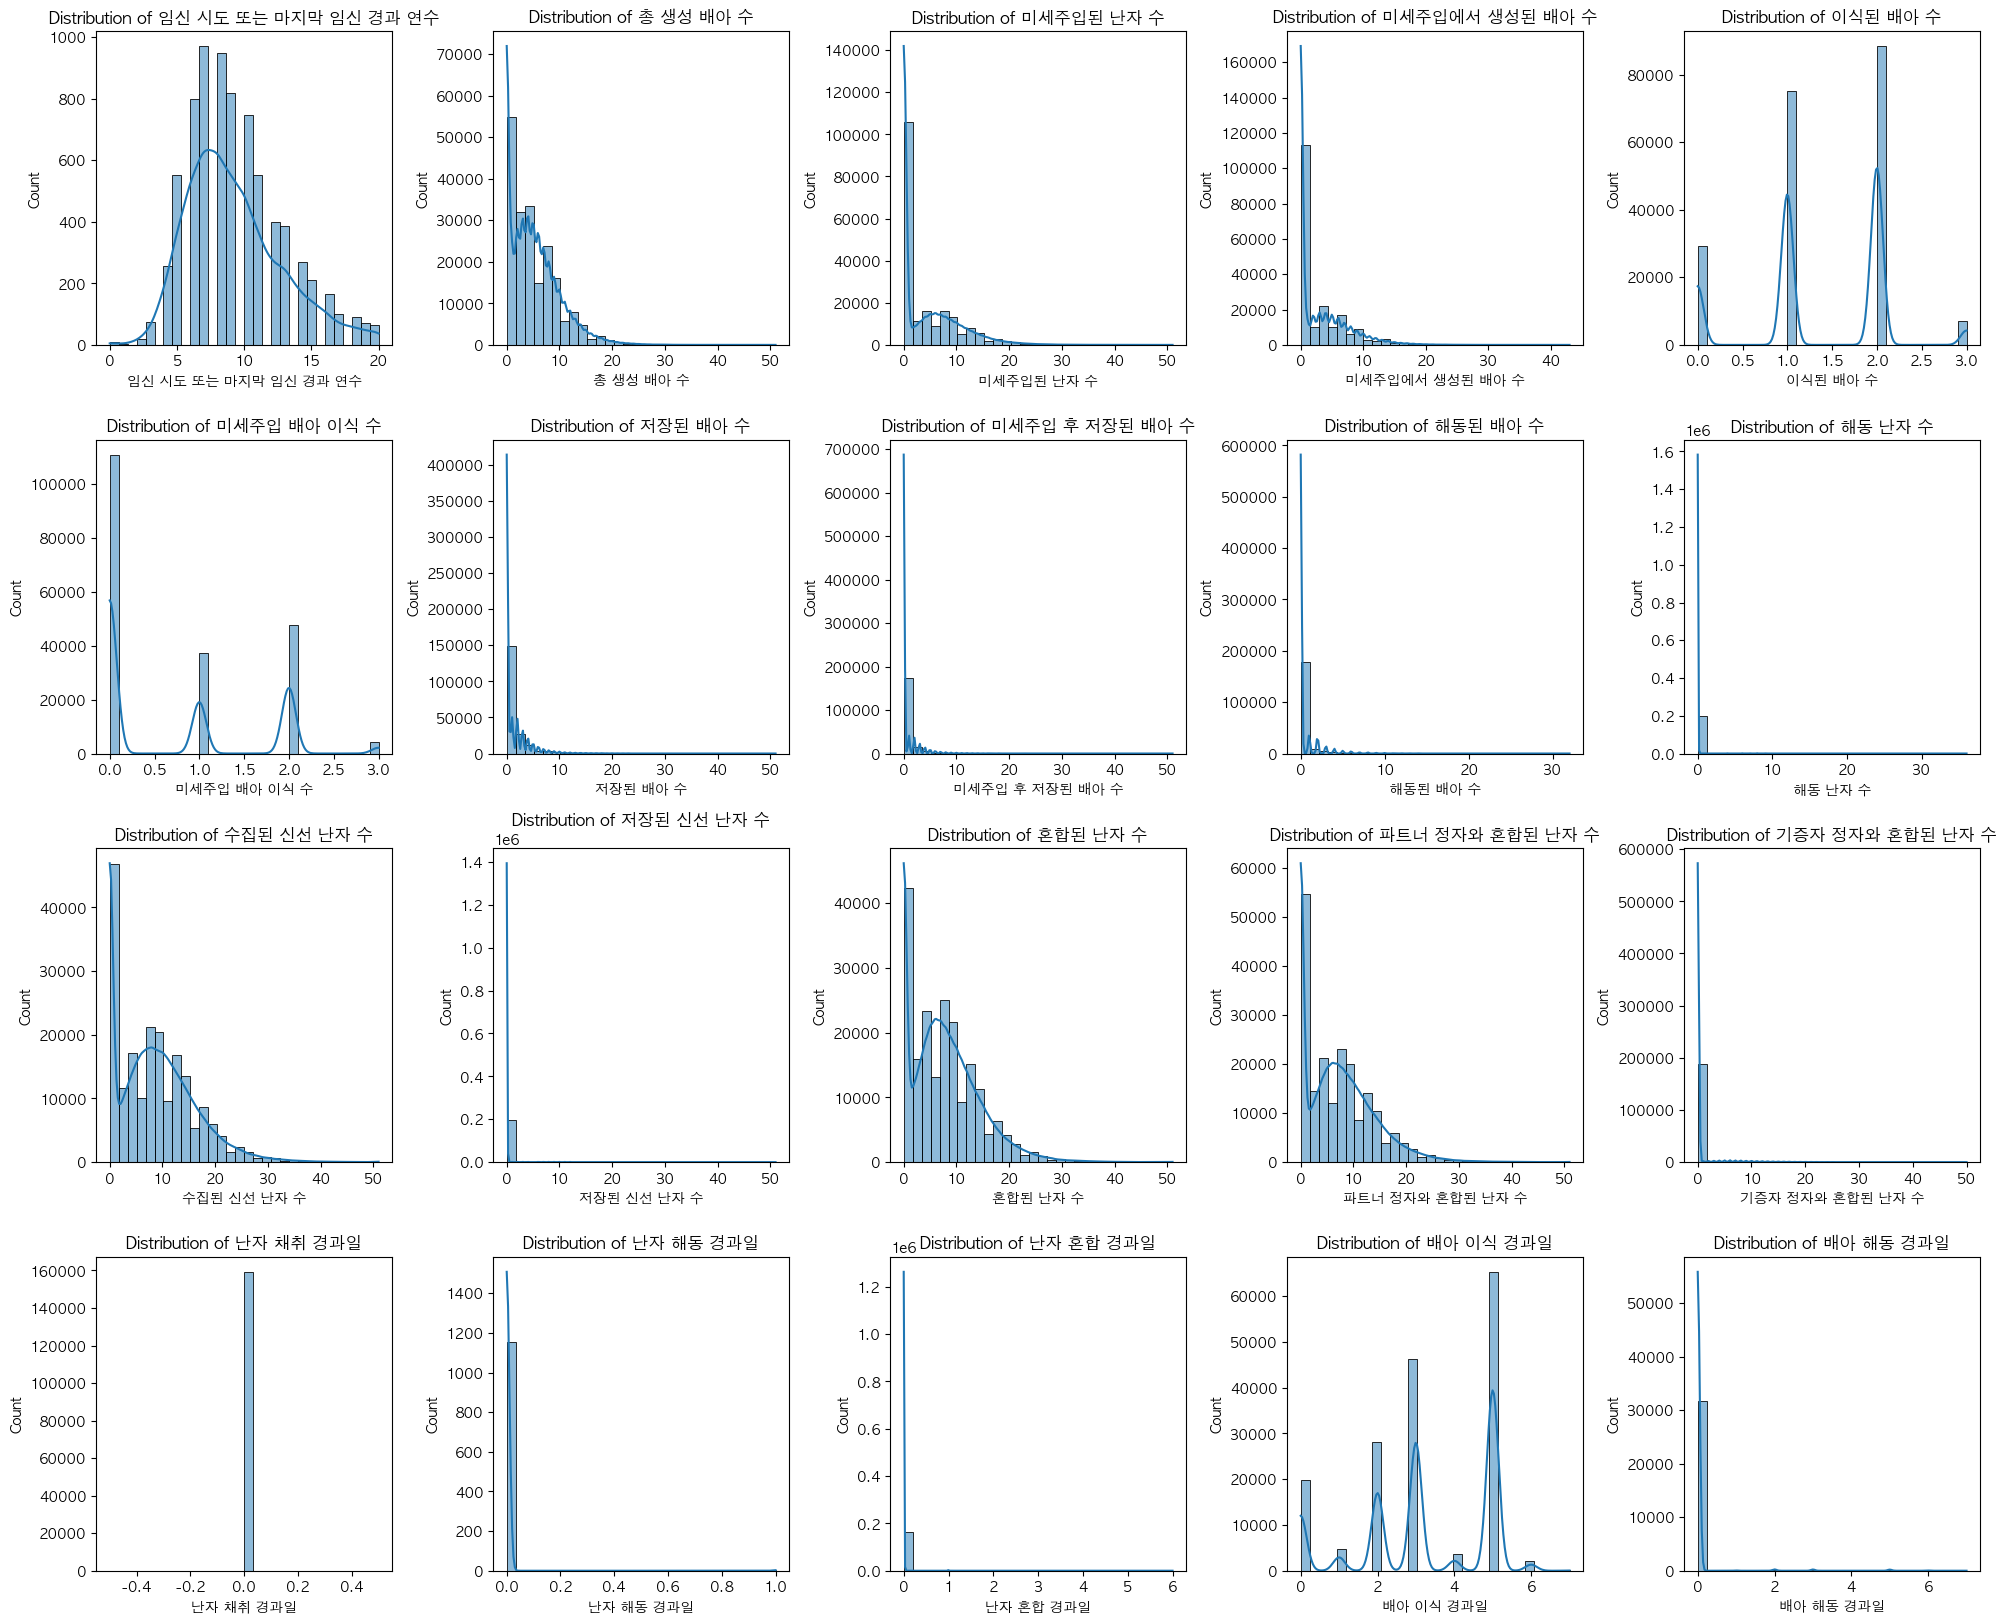

In [14]:
plot_histograms(X_train)

In [15]:
def plot_boxplots(df):
    num_vars = len(numeric_columns)
    rows = (num_vars // 5) + 1  # 한 행에 5개씩 배치

    fig, axes = plt.subplots(rows, 5, figsize=(20, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f"Boxplot of {col}")

    for j in range(i + 1, len(axes)):  # 남은 빈 공간 제거
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


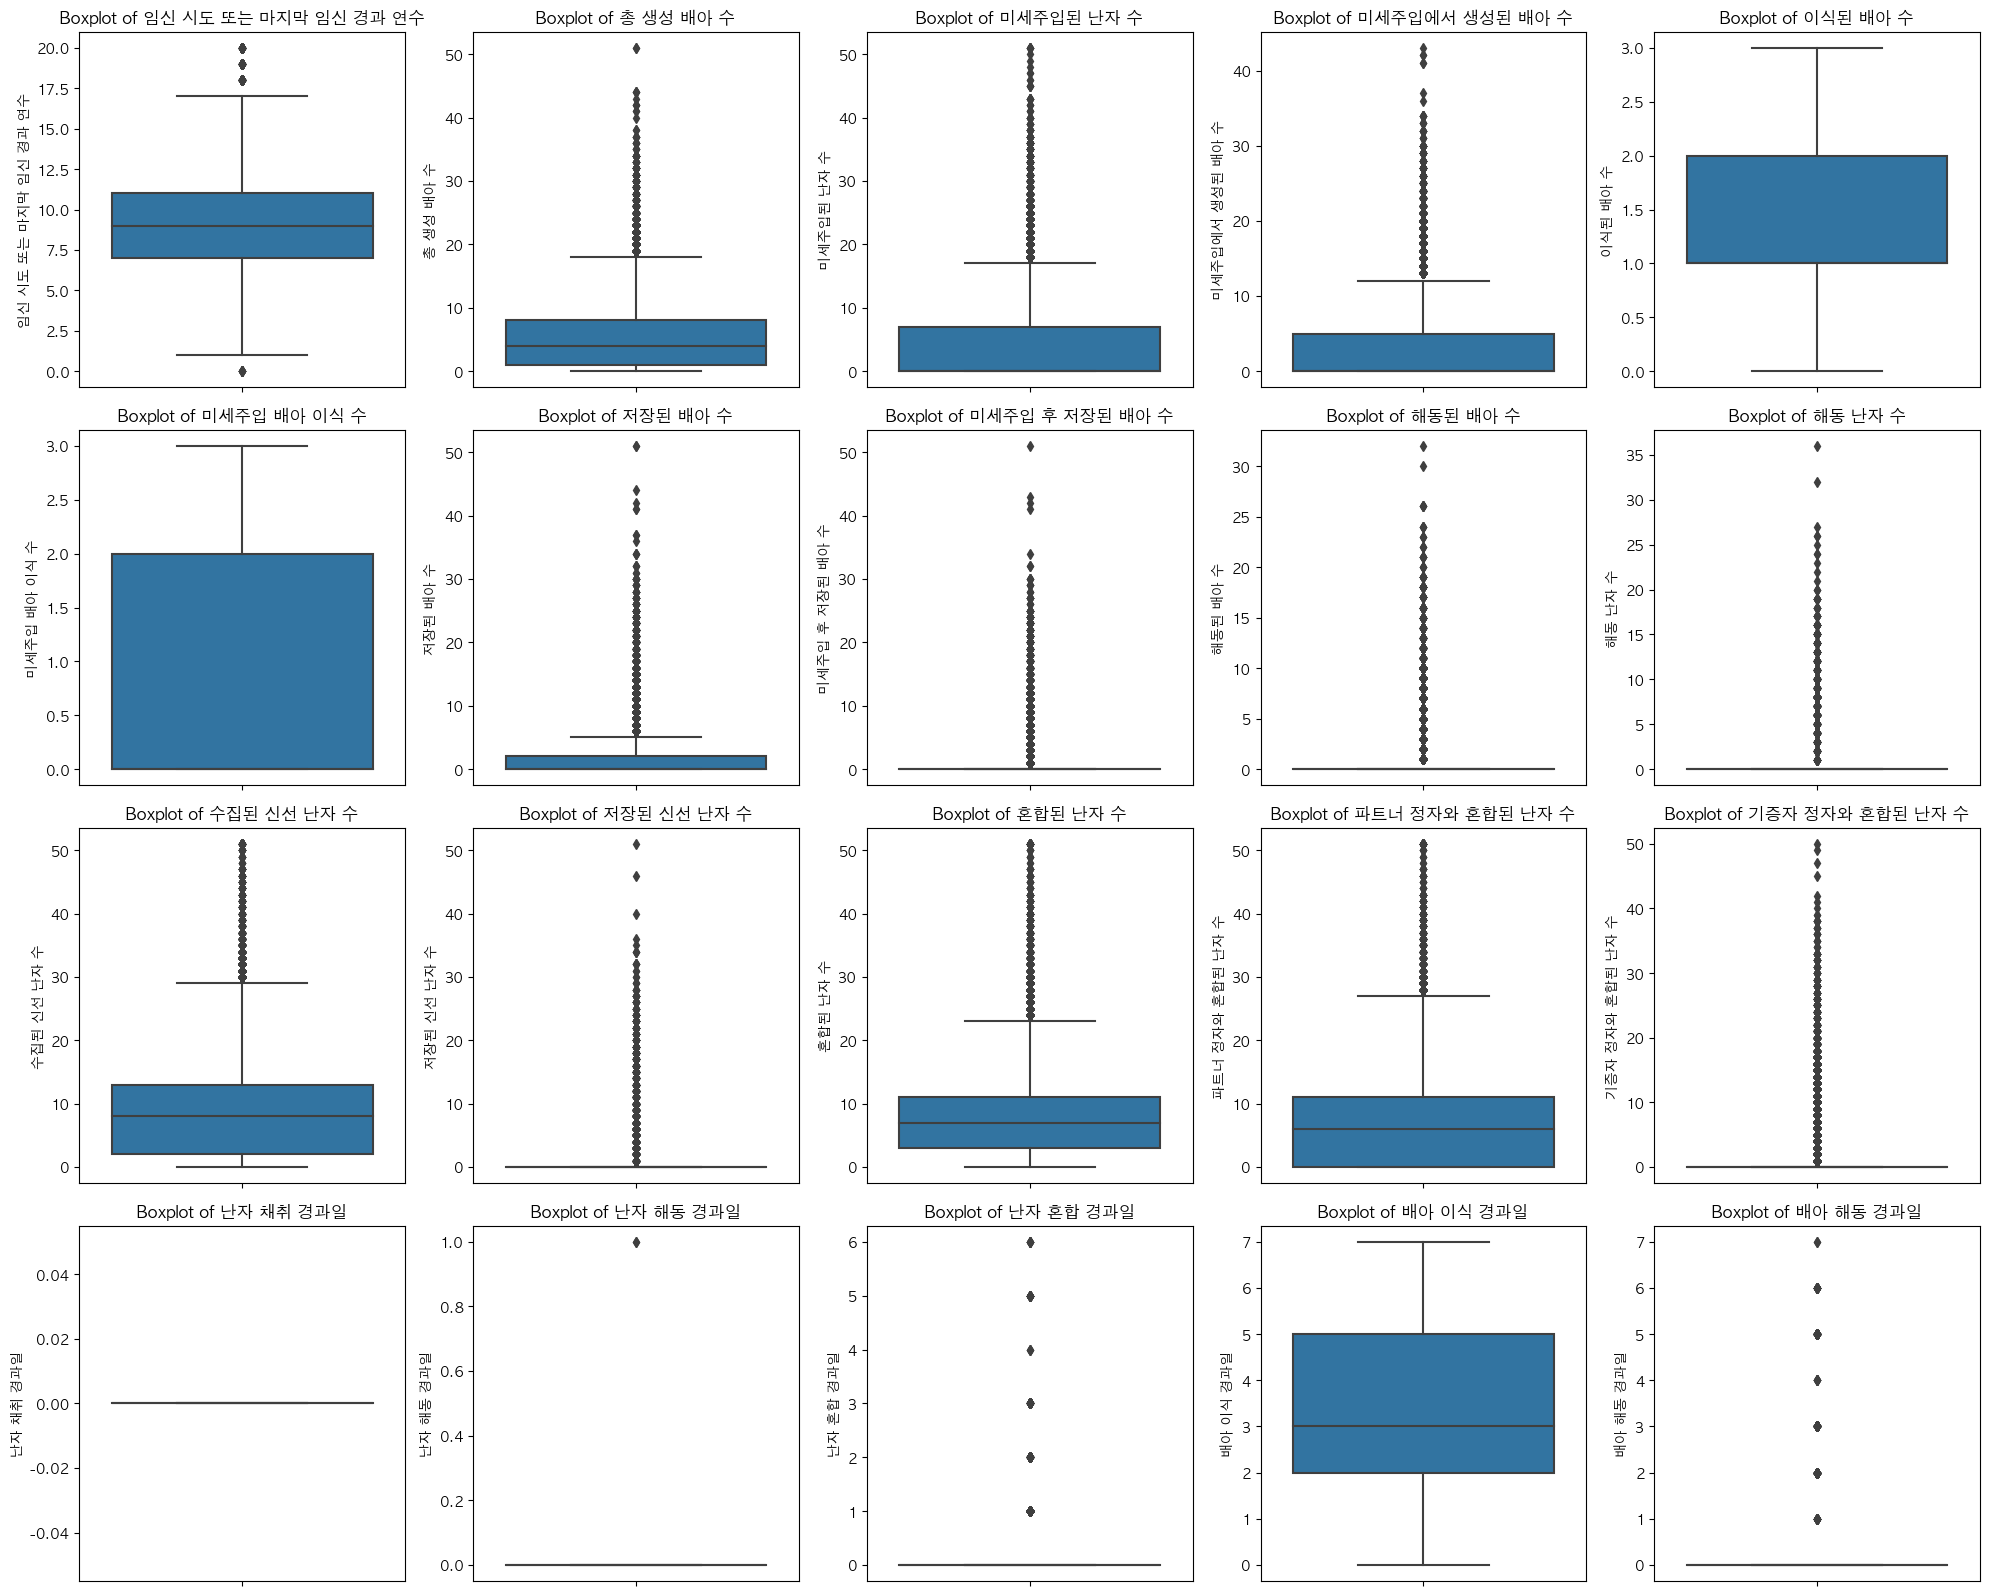

In [16]:
plot_boxplots(X_train)

In [19]:
#결측치 확인
X_train[numeric_columns].isnull().sum()/len(X_train)

임신 시도 또는 마지막 임신 경과 연수    0.963395
총 생성 배아 수                0.024581
미세주입된 난자 수               0.024581
미세주입에서 생성된 배아 수          0.024581
이식된 배아 수                 0.024581
미세주입 배아 이식 수             0.024581
저장된 배아 수                 0.024581
미세주입 후 저장된 배아 수          0.024581
해동된 배아 수                 0.024581
해동 난자 수                  0.024581
수집된 신선 난자 수              0.024581
저장된 신선 난자 수              0.024581
혼합된 난자 수                 0.024581
파트너 정자와 혼합된 난자 수         0.024581
기증자 정자와 혼합된 난자 수         0.024581
난자 채취 경과일                0.223464
난자 해동 경과일                0.994373
난자 혼합 경과일                0.208801
배아 이식 경과일                0.170065
배아 해동 경과일                0.843490
dtype: float64

In [25]:
train

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
6194,TRCMWS,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,5.0,NaN,1
59110,TRCMWS,만35-37세,NaN,IVF,IVF,0,알 수 없음,1.0,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
1923,TRDQAZ,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
44972,TRVNRY,만40-42세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
185436,TRCMWS,만40-42세,NaN,IVF,ICSI,0,알 수 없음,1.0,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,5.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40192,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
249683,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,5.0,NaN,1
108744,TRJXFG,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,1.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,5.0,NaN,0
138671,TRYBLT,만38-39세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


<AxesSubplot: xlabel='시술 유형', ylabel='임신 성공 여부'>

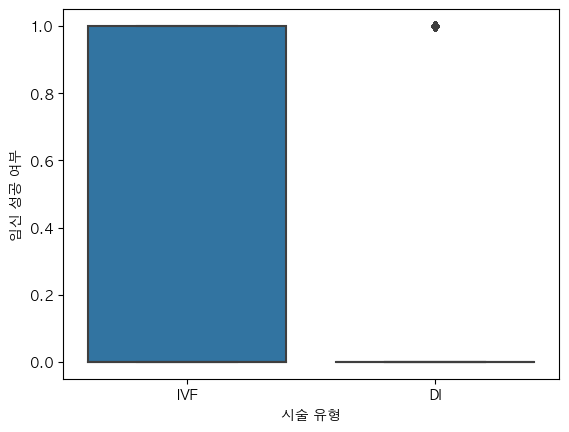

In [23]:
sns.boxplot(x='시술 유형', y='임신 성공 여부', data=train)

In [27]:
X_train["특정 시술 유형"].unique()

array(['ICSI', 'IVF', 'Unknown', 'IUI', 'IVF:Unknown', 'ICSI:ICSI',
       'ICSI:Unknown', 'IVF:IVF', 'IVF / BLASTOCYST', 'ICSI:IVF',
       'ICSI / BLASTOCYST ', 'Generic DI', 'ICSI / AH', 'IVF / AH',
       'IVF:ICSI', 'ICI', 'IVI', 'FER', 'GIFT',
       'ICSI / BLASTOCYST:IVF / BLASTOCYST',
       'ICSI / BLASTOCYST :IVF / BLASTOCYST', 'ICSI / AH:Unknown',
       'ICSI / BLASTOCYST :ICSI', 'IVF / AH:ICSI / AH', nan], dtype=object)

In [21]:

# ✅ Step 1: 시술 유형 One-Hot Encoding
df['is_IVF'] = (df['시술 유형'] == 'IVF').astype(int)
df['is_DI'] = (df['시술 유형'] == 'DI').astype(int)

# ✅ Step 2: 주요 세부 시술 유형을 개별 Feature로 변환
procedures = ["ICSI", "BLASTOCYST", "AH", "FER", "GIFT", "IUI", "ICI", "IVI", "Generic DI"]

for proc in procedures:
    df[f'has_{proc}'] = df['세부 시술 유형'].apply(lambda x: 1 if pd.notna(x) and proc in x.replace(" ", "") else 0)

# ✅ Step 3: 개선된 Unknown 처리
# (1) Unknown이 포함된 경우, 해당 시술별 Unknown 여부 인코딩
for proc in procedures:
    df[f'unknown_{proc}'] = df['세부 시술 유형'].apply(lambda x: 1 if pd.notna(x) and 'Unknown' in x and proc in x.replace(" ", "") else 0)

# (2) 전체 Unknown 여부 (일반적인 Unknown 처리)
df['has_Unknown'] = df['세부 시술 유형'].apply(lambda x: 1 if pd.isna(x) or 'Unknown' in str(x) else 0)

# ✅ 최종 결과 확인
import ace_tools as tools
tools.display_dataframe_to_user(name="개선된 Unknown 처리 결과", dataframe=df)

Index(['시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '시술 유형', '특정 시술 유형',
       '배란 자극 여부', '배란 유도 유형', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부',
       '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인',
       '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환',
       '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제',
       '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
       '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '배아 생성 주요 이유', '총 시술 횟수',
       '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수',
       'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수',
       '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
       '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수',
       '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처',
       '난자 기증자 나이', '정자 기증자 나이', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부',
       '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부', '난자